In [1]:
import pandas as pd
import numpy as np
data=[pd.read_pickle('C:/Users/042300/Desktop/data-master/data_new%s.pickle'%i) for i in range(4)]

In [2]:
data=pd.concat(data);data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0,5,0,0,0,0,0,0,0,0,0
1,1,11,1,0,1,1,1,1,0,0,0
2,1,7,1,0,1,2,2,1,0,0,0


In [3]:
data1=data.drop([7,8,9,10],axis=1)
data1=data1.applymap(lambda x:str(x))
data2=data1.copy()
data2['word_all']=data2.apply(lambda x:'_'.join(x.values[1:7]),axis=1)
vocab_all=data2['word_all'].unique()
data2['word_part']=data2.apply(lambda x:'_'.join(x.values[1:5]),axis=1)
vocab_part=data2['word_part'].unique()
data_part=data2.loc[:,[0,'word_part']]

In [4]:
cust_unique=data_part[0].unique()
doc=[data_part[data_part[0]==cust]['word_part'].values for cust in cust_unique]

In [7]:
len(doc)==len(cust_unique)

True

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
doc_raw_text=[' '.join(i) for i in doc]

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(doc_raw_text)

In [13]:
len(vectorizer.get_feature_names())

425

In [21]:
X.toarray()

array([[   0,    0,    0, ...,    0,    0,    0],
       [6130,  252,  445, ...,    1,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vect=TfidfVectorizer()
X_tfidf=tfidf_vect.fit_transform(doc_raw_text)

In [19]:
X_tfidf.toarray()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.37088838e-02, 3.47197577e-03, 5.88694992e-03, ...,
        1.27910677e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
X_tfidf.shape

(1418, 425)

In [22]:
#####SVD/LSI####
from sklearn.decomposition import TruncatedSVD

In [23]:
svd=TruncatedSVD(n_components=6, n_iter=7, random_state=0)
svd.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=6, n_iter=7, random_state=0,
             tol=0.0)

In [24]:
svd.singular_values_

array([15.6604983 , 10.46405506,  9.78548843,  9.12703061,  8.82157441,
        7.20971366])

In [25]:
svd.explained_variance_ratio_

array([0.08613641, 0.08617186, 0.07015095, 0.06485385, 0.06097374,
       0.04071456])

In [26]:
svd.explained_variance_ratio_.sum()

0.4090013794025016

In [27]:
svd.fit_transform(X_tfidf)

array([[ 3.60225999e-02, -1.03223978e-02,  2.52453192e-03,
        -2.11897430e-02,  7.85274384e-03,  1.77856926e-02],
       [ 3.78836320e-02, -3.15687808e-04,  7.01612383e-03,
        -2.29886106e-02,  1.64149576e-02,  1.31648503e-02],
       [ 4.32197209e-01,  3.01484896e-01,  2.80714338e-02,
        -2.30148665e-01,  4.32518972e-01, -2.55041866e-02],
       ...,
       [ 3.66801983e-01, -1.60294238e-01,  1.63637746e-02,
        -4.49770178e-01,  3.69526661e-01, -2.11338934e-01],
       [ 2.40726928e-04, -4.62325664e-04,  3.39965450e-05,
        -6.08757925e-04, -1.96145551e-04, -4.34511822e-04],
       [ 9.64222105e-03, -5.25276287e-03, -2.60382457e-04,
        -5.04672418e-03,  1.24413223e-03,  1.04717642e-02]])

In [46]:
svd=TruncatedSVD(n_components=40, n_iter=7, random_state=0)
svd.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=40, n_iter=7, random_state=0,
             tol=0.0)

In [47]:
svd.explained_variance_ratio_.sum()

0.796080275545759

In [32]:
u,s,v=np.linalg.svd(X_tfidf.toarray())

In [31]:
X_tfidf.toarray()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.37088838e-02, 3.47197577e-03, 5.88694992e-03, ...,
        1.27910677e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [34]:
u.shape

(1418, 1418)

In [35]:
v.shape

(425, 425)

In [36]:
s.shape

(425,)

In [37]:
v

array([[-1.11458467e-03, -5.19155683e-05, -4.45711205e-06, ...,
        -1.08397422e-03, -3.34548595e-03, -1.16474176e-02],
       [ 6.82182993e-04,  5.13588728e-05,  2.58596302e-07, ...,
        -1.46347643e-04, -1.15134449e-03, -1.85247742e-03],
       [-5.45668805e-04, -5.93334744e-05, -4.92870587e-06, ...,
        -2.15415209e-04,  1.23516796e-04, -3.24617879e-04],
       ...,
       [ 0.00000000e+00, -9.52912066e-17,  7.97752698e-04, ...,
         7.52165257e-19, -3.21449003e-19,  2.98155597e-19],
       [ 0.00000000e+00, -2.72270271e-17,  2.59294364e-04, ...,
         1.37896964e-18,  2.74862191e-19,  2.54109884e-20],
       [ 0.00000000e+00,  6.50729470e-14, -6.16058812e-01, ...,
        -1.68528386e-15,  5.97612237e-16, -2.87964097e-16]])

In [38]:
u

array([[-2.30022055e-03,  9.86433163e-04, -2.58082541e-04, ...,
         4.90935159e-04,  2.79638437e-04,  7.60129210e-05],
       [-2.41905659e-03,  3.01949303e-05, -7.16912117e-04, ...,
         3.02221356e-18,  1.63985579e-18, -3.82011859e-18],
       [-2.75979219e-02, -2.88114687e-02, -2.86863713e-03, ...,
        -1.22943392e-03, -2.08838284e-04, -7.10245594e-04],
       ...,
       [-2.34221144e-02,  1.53185432e-02, -1.67230626e-03, ...,
         8.91763144e-01,  5.71656600e-03,  2.80790490e-03],
       [-1.53716003e-05,  4.41826068e-05, -3.47332819e-06, ...,
         4.13887652e-05,  4.45785297e-03, -3.24068283e-04],
       [-6.15703338e-04,  5.01978015e-04,  2.65984069e-05, ...,
         1.62525790e-03, -1.99814457e-02,  5.74514357e-01]])

In [39]:
from sklearn.decomposition import NMF

In [55]:
nmf=NMF(n_components=3,beta_loss='frobenius')

In [56]:
W = nmf.fit_transform(X_tfidf);W

array([[7.84653690e-03, 4.77684527e-03, 7.75531526e-04],
       [6.15654064e-03, 7.68513497e-03, 1.96267992e-03],
       [1.53276732e-02, 1.61558411e-01, 1.87061427e-03],
       ...,
       [8.30547742e-02, 4.76262858e-02, 3.09797600e-03],
       [1.02930434e-04, 0.00000000e+00, 1.36474398e-05],
       [2.61876498e-03, 6.02773525e-04, 0.00000000e+00]])

In [57]:
H=nmf.components_;H

array([[4.98351105e-03, 2.62401440e-04, 1.19544723e-05, ...,
        2.55560333e-03, 7.53456073e-03, 3.13625136e-02],
       [9.50175707e-04, 1.32800456e-05, 1.06183207e-05, ...,
        3.07084472e-03, 1.00476812e-02, 3.08786502e-02],
       [1.76250196e-03, 1.85786711e-04, 1.43302404e-05, ...,
        3.92676803e-04, 0.00000000e+00, 1.62709232e-03]])

In [82]:
cust_class=data[[0,7]].drop_duplicates(keep='first')

In [85]:
cust_class[7].value_counts()

0    1206
2     161
1      48
3       3
Name: 7, dtype: int64

In [91]:
predict_nmf=np.argmax(W,axis=1)

In [97]:
np.unique(predict_nmf,return_counts=True)

(array([0, 1, 2], dtype=int64), array([616, 671, 131], dtype=int64))

In [113]:
pre2=np.where(predict_nmf==2)[0]

In [116]:
real2=cust_class[cust_class[7]==2][0].values

In [120]:
sum([i in pre2 for i in real2])

5

In [146]:
#####SVD#####
svd=TruncatedSVD(n_components=6, n_iter=7, random_state=0)
svd.fit_transform(X_tfidf)

array([[ 3.60225999e-02, -1.03223978e-02,  2.52453192e-03,
        -2.11897430e-02,  7.85274384e-03,  1.77856926e-02],
       [ 3.78836320e-02, -3.15687808e-04,  7.01612383e-03,
        -2.29886106e-02,  1.64149576e-02,  1.31648503e-02],
       [ 4.32197209e-01,  3.01484896e-01,  2.80714338e-02,
        -2.30148665e-01,  4.32518972e-01, -2.55041866e-02],
       ...,
       [ 3.66801983e-01, -1.60294238e-01,  1.63637746e-02,
        -4.49770178e-01,  3.69526661e-01, -2.11338934e-01],
       [ 2.40726928e-04, -4.62325664e-04,  3.39965450e-05,
        -6.08757925e-04, -1.96145551e-04, -4.34511822e-04],
       [ 9.64222105e-03, -5.25276287e-03, -2.60382457e-04,
        -5.04672418e-03,  1.24413223e-03,  1.04717642e-02]])

In [152]:
tp=svd.fit_transform(X_tfidf)

In [156]:
tp

array([[ 3.60225999e-02, -1.03223978e-02,  2.52453192e-03,
        -2.11897430e-02,  7.85274384e-03,  1.77856926e-02],
       [ 3.78836320e-02, -3.15687808e-04,  7.01612383e-03,
        -2.29886106e-02,  1.64149576e-02,  1.31648503e-02],
       [ 4.32197209e-01,  3.01484896e-01,  2.80714338e-02,
        -2.30148665e-01,  4.32518972e-01, -2.55041866e-02],
       ...,
       [ 3.66801983e-01, -1.60294238e-01,  1.63637746e-02,
        -4.49770178e-01,  3.69526661e-01, -2.11338934e-01],
       [ 2.40726928e-04, -4.62325664e-04,  3.39965450e-05,
        -6.08757925e-04, -1.96145551e-04, -4.34511822e-04],
       [ 9.64222105e-03, -5.25276287e-03, -2.60382457e-04,
        -5.04672418e-03,  1.24413223e-03,  1.04717642e-02]])

In [147]:
svd.fit_transform(X_tfidf).shape

(1418, 6)

In [148]:
from sklearn.cluster import KMeans

In [270]:
X_tfidf.shape

(1418, 425)

In [300]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_tfidf)

In [301]:
np.unique(kmeans.predict(X_tfidf),return_counts=True)

(array([0, 1, 2]), array([830, 378, 210], dtype=int64))

In [302]:
b=kmeans.predict(X_tfidf)
b=np.where(b==0)[0]

In [290]:
########
svd=TruncatedSVD(n_components=10, n_iter=7, random_state=0)
tp=svd.fit_transform(X_tfidf)

In [291]:
tp.shape

(1418, 10)

In [292]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(tp)

In [293]:
np.unique(kmeans.predict(tp),return_counts=True)

(array([0, 1, 2]), array([371, 951,  96], dtype=int64))

In [177]:
#################
##tomorrow contact FICO increase dimension?
##which kind of feature should we use to generate a word? 
##txn_type, amt, paymtmethod, cust_cdd_edd_info, cust_risk so on...
##do you have any paper about this method?

In [313]:
sum([i in a for i in b])/len(b)

0.3036144578313253

In [314]:
sum([i in b for i in a])/len(a)

0.9581749049429658

In [296]:
nmf=NMF(n_components=3,solver ='mu',beta_loss='kullback-leibler',random_state=0)

In [297]:
W = nmf.fit_transform(X_tfidf);W

array([[1.92904015e-02, 0.00000000e+00, 2.82455604e-01],
       [5.14709002e-02, 0.00000000e+00, 9.43901411e-01],
       [6.46409994e-02, 8.25011999e-02, 3.58530429e-01],
       ...,
       [1.25195648e-01, 0.00000000e+00, 0.00000000e+00],
       [7.37536120e-02, 0.00000000e+00, 7.78025476e-10],
       [7.37536124e-02, 0.00000000e+00, 0.00000000e+00]])

In [298]:
predict_nmf=np.argmax(W,axis=1)

In [299]:
np.unique(predict_nmf,return_counts=True)

(array([0, 1, 2], dtype=int64), array([902, 253, 263], dtype=int64))

In [312]:
a=predict_nmf
a=np.where(a==2)[0]

In [349]:
########Dense#######
pattern=lambda: np.random.uniform(100,200,1)
noise=lambda: np.random.uniform(0,5,1)
lambda_vec1=[pattern()[0] for i in range(3)]
lambda_vec1.extend([noise()[0] for i in range(7)])
lambda_vec2=[noise()[0] for i in range(3)]
lambda_vec2.extend([pattern()[0] for i in range(3)])
lambda_vec2.extend([noise()[0] for i in range(4)])
lambda_vec3=[noise()[0] for i in range(6)]
lambda_vec3.extend([pattern()[0] for i in range(4)])

In [360]:
cust_1=lambda: [np.random.poisson(lam=i) for i in lambda_vec1]
cust_2=lambda: [np.random.poisson(lam=i) for i in lambda_vec2]
cust_3=lambda: [np.random.poisson(lam=i) for i in lambda_vec3]

In [397]:
data=[cust_1() for i in range(100)]
data.extend([cust_2() for i in range(200)])
data.extend([cust_3() for i in range(300)])

In [422]:
data

[[184, 115, 196, 2, 5, 4, 3, 1, 4, 1],
 [177, 117, 168, 5, 6, 3, 2, 1, 5, 6],
 [192, 125, 182, 2, 3, 1, 1, 2, 6, 3],
 [160, 120, 213, 0, 6, 6, 3, 0, 3, 4],
 [190, 111, 196, 5, 4, 2, 0, 0, 2, 4],
 [187, 126, 200, 4, 6, 1, 2, 1, 1, 6],
 [177, 126, 189, 0, 2, 3, 5, 1, 2, 3],
 [154, 114, 179, 3, 5, 3, 4, 0, 2, 1],
 [165, 127, 179, 6, 6, 3, 4, 0, 2, 0],
 [156, 108, 167, 4, 4, 1, 1, 2, 4, 6],
 [165, 102, 198, 4, 10, 2, 1, 2, 4, 2],
 [177, 129, 177, 4, 3, 1, 3, 0, 6, 4],
 [187, 119, 191, 3, 7, 2, 1, 4, 3, 2],
 [172, 128, 163, 7, 2, 1, 4, 2, 3, 3],
 [179, 119, 188, 1, 3, 3, 2, 1, 2, 5],
 [196, 111, 186, 4, 9, 1, 3, 1, 5, 4],
 [175, 125, 216, 1, 6, 0, 5, 4, 3, 1],
 [179, 107, 203, 4, 6, 5, 5, 1, 5, 4],
 [188, 107, 177, 4, 6, 2, 3, 1, 1, 2],
 [181, 122, 192, 4, 10, 2, 2, 0, 1, 1],
 [206, 124, 169, 3, 4, 4, 1, 0, 3, 3],
 [183, 130, 188, 3, 4, 2, 5, 1, 2, 3],
 [152, 128, 189, 1, 6, 3, 2, 1, 8, 2],
 [176, 111, 184, 1, 2, 0, 5, 2, 6, 3],
 [174, 128, 169, 5, 6, 1, 2, 3, 2, 1],
 [165, 119, 188, 4, 6, 

In [398]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=3,random_state=0)
svd.fit(data)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[5235.56384717 3820.95173635 2846.06503334]
[0.41575523 0.33671089 0.23987395]
0.9923400632790581


In [400]:
data1=svd.transform(data)
data1=pd.DataFrame(data1)
data1['real_class']=0
data1['real_class'][100:300]=1
data1['real_class'][300:600]=2
data1.tail(5)

D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,0,1,2,real_class
595,308.639945,-10.893103,-1.142475,2
596,286.591892,-11.037807,-5.049850,2
597,293.886927,-9.784151,-4.010165,2
598,291.356605,-8.850110,-3.465249,2
599,284.606702,-10.224707,-3.781402,2


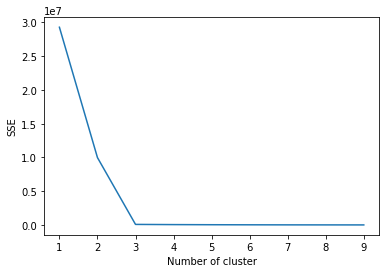

In [401]:
####K-means for clustering#############
####Elbow method for select best K#####
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data1[[0,1,2]])
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [402]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(data1[[0,1,2]])
data1["pred_class"] = kmeans.labels_

In [403]:
data1['pred_class'].value_counts()

1    300
2    200
0    100
Name: pred_class, dtype: int64

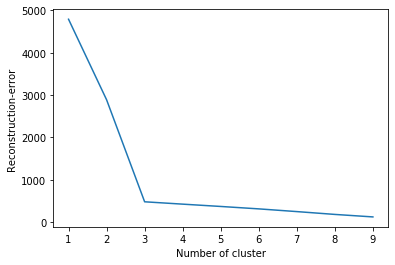

In [407]:
########NMF#########
re = {}
for k in range(1, 10):
    nmf = NMF(n_components=k, max_iter=1000).fit(data)
    re[k] = nmf.reconstruction_err_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Reconstruction-error")
plt.show()

In [408]:
nmf = NMF(n_components=3, max_iter=1000).fit(data)
W=nmf.transform(data)
H=nmf.components_
W

array([[0.03441629, 0.07375927, 5.4825553 ],
       [0.06130567, 0.10159067, 5.07096966],
       [0.04399124, 0.02807335, 5.48437494],
       ...,
       [4.06110645, 0.02904634, 0.04035838],
       [4.02516532, 0.04163328, 0.05033238],
       [3.93347396, 0.01565328, 0.04035766]])

In [413]:
np.unique(np.argmax(W,axis=1),return_counts=True)

(array([0, 1, 2], dtype=int64), array([300, 200, 100], dtype=int64))

In [414]:
H

array([[4.85831412e-02, 0.00000000e+00, 7.72193495e-01, 8.83235585e-01,
        6.88636170e-01, 0.00000000e+00, 4.77823760e+01, 3.43001966e+01,
        2.74214725e+01, 3.20509255e+01],
       [0.00000000e+00, 5.32057176e-01, 9.06770691e-01, 4.12107434e+01,
        2.44822595e+01, 3.90137884e+01, 5.88920160e-01, 0.00000000e+00,
        4.06400268e-01, 9.38795636e-02],
       [3.40883459e+01, 2.17110418e+01, 3.47522119e+01, 2.18297454e-02,
        5.62339781e-01, 0.00000000e+00, 1.66595955e-01, 0.00000000e+00,
        4.36358002e-01, 1.69179140e-01]])

In [419]:
######LDA#######
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=0)
lda.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [421]:
np.unique(np.argmax(lda.transform(data),axis=1),return_counts=True)

(array([0, 3, 4], dtype=int64), array([100, 300, 200], dtype=int64))

In [ ]:
#######Auto-encoder######


In [481]:
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have three orignal features: amt, paymtd, paytype
#dictionary for each feature is as following:
##Amt:0-9
##Paymtd:0-9
##Paytype:0-9
##RecorPay:0-9
#suppose we have three class of txn as following:
##txn_class1:Amt always in bin 0
##txn_class1:Amt always in bin 5
##txn_class1:Amt always in bin 9
###We want to use our models to find such three kinds of txn_class
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.1,0.1,0.8])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def txn_class2():
    amt=np.random.choice(10,1,p=[0.8,0.1,0.1,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,1.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

In [487]:
data=[txn_class1() for i in range(1000)]
data.extend([txn_class2() for i in range(2000)])


In [488]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=4,random_state=0)
svd.fit(data)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[546.40782999 213.22049948 160.19150732 156.75613299]
[0.18648389 0.30784305 0.17477846 0.16735804]
0.8364634384800224


In [489]:
u,s,v=np.linalg.svd(data,full_matrices=True)

In [490]:
s

array([546.40782999, 213.22049948, 160.19150732, 156.75613299,
       154.95385661])

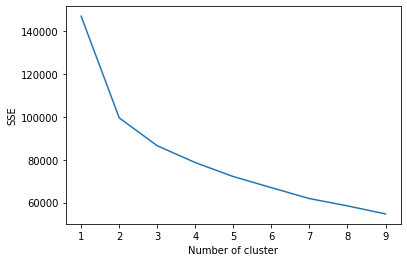

In [491]:
#######Kmeans######
####K-means for clustering#############
####Elbow method for select best K#####
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


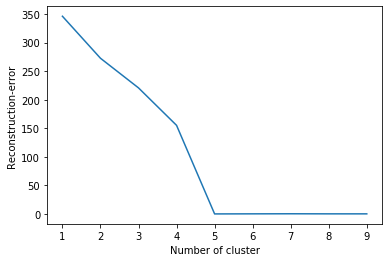

In [492]:
########NMF#########
re = {}
for k in range(1, 10):
    nmf = NMF(n_components=k, max_iter=1000).fit(data)
    re[k] = nmf.reconstruction_err_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Reconstruction-error")
plt.show()

In [502]:
####sparse####
corpus=[[str(j)+'_'+str(idx)  for idx ,j in enumerate(i)] for i in data]

In [510]:
doc=[' '.join(i) for i in corpus]

In [511]:
doc

['9_0 6_1 4_2 8_3 5_4',
 '7_0 3_1 6_2 8_3 4_4',
 '9_0 6_1 6_2 1_3 2_4',
 '9_0 8_1 9_2 1_3 6_4',
 '9_0 9_1 9_2 9_3 3_4',
 '9_0 7_1 9_2 8_3 2_4',
 '9_0 7_1 3_2 1_3 1_4',
 '9_0 1_1 2_2 4_3 8_4',
 '9_0 7_1 8_2 5_3 0_4',
 '9_0 8_1 1_2 2_3 9_4',
 '9_0 3_1 4_2 4_3 3_4',
 '9_0 5_1 4_2 8_3 9_4',
 '9_0 6_1 1_2 8_3 2_4',
 '9_0 1_1 0_2 9_3 9_4',
 '8_0 9_1 3_2 0_3 3_4',
 '9_0 4_1 4_2 3_3 5_4',
 '9_0 6_1 2_2 8_3 0_4',
 '9_0 7_1 3_2 9_3 8_4',
 '9_0 2_1 7_2 8_3 6_4',
 '7_0 3_1 5_2 0_3 6_4',
 '9_0 6_1 2_2 8_3 4_4',
 '9_0 4_1 6_2 0_3 9_4',
 '7_0 9_1 1_2 7_3 3_4',
 '7_0 4_1 8_2 3_3 5_4',
 '9_0 7_1 7_2 2_3 3_4',
 '9_0 2_1 5_2 4_3 6_4',
 '9_0 3_1 7_2 7_3 9_4',
 '9_0 2_1 4_2 4_3 1_4',
 '9_0 0_1 0_2 4_3 5_4',
 '8_0 4_1 4_2 8_3 0_4',
 '9_0 2_1 3_2 4_3 3_4',
 '9_0 0_1 8_2 5_3 1_4',
 '9_0 2_1 0_2 2_3 3_4',
 '9_0 4_1 9_2 7_3 1_4',
 '9_0 9_1 3_2 5_3 2_4',
 '7_0 3_1 9_2 3_3 3_4',
 '9_0 0_1 4_2 6_3 9_4',
 '7_0 2_1 9_2 2_3 5_4',
 '9_0 1_1 9_2 5_3 4_4',
 '9_0 0_1 3_2 6_3 6_4',
 '7_0 5_1 1_2 0_3 7_4',
 '9_0 0_1 9_2 6_

In [514]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(doc)
print(vectorizer.get_feature_names())
print(X.toarray()) 
data=X.toarray()

['0_0', '0_1', '0_2', '0_3', '0_4', '1_0', '1_1', '1_2', '1_3', '1_4', '2_0', '2_1', '2_2', '2_3', '2_4', '3_1', '3_2', '3_3', '3_4', '4_1', '4_2', '4_3', '4_4', '5_1', '5_2', '5_3', '5_4', '6_1', '6_2', '6_3', '6_4', '7_0', '7_1', '7_2', '7_3', '7_4', '8_0', '8_1', '8_2', '8_3', '8_4', '9_0', '9_1', '9_2', '9_3', '9_4']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


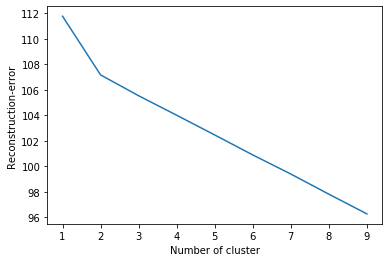

In [515]:
########NMF#########
re = {}
for k in range(1, 10):
    nmf = NMF(n_components=k, max_iter=1000).fit(data)
    re[k] = nmf.reconstruction_err_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Reconstruction-error")
plt.show()

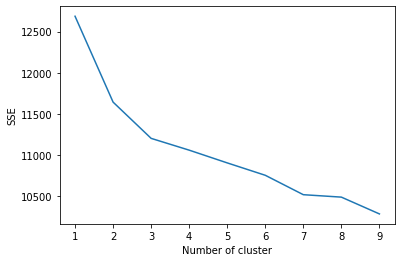

In [516]:
#######Kmeans######
####K-means for clustering#############
####Elbow method for select best K#####
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [518]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=20,random_state=0)
svd.fit(data)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[50.09510361 31.76682564 19.23499171 18.82119977 18.70593187 18.63154461
 18.53714456 18.41318357 18.19023371 18.11053126 17.99869013 17.93896908
 17.75919029 17.74345111 17.67845468 17.58136583 17.52135678 17.41747963
 17.24923393 17.16863725]
[0.02181117 0.07402963 0.0291508  0.02787826 0.02749544 0.02731663
 0.02705821 0.02672608 0.02607823 0.02583065 0.02552432 0.02536708
 0.02486131 0.02478455 0.024628   0.02435662 0.02419976 0.02390649
 0.02342888 0.02319785]
0.5576299624662133


In [524]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)